In [6]:
# %matplotlib notebook

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
t = 200
filename=r"..\..\..\Data\A304\A304_MR_center_contact\A304_SRO_NGO_200K.csv"
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value','multiplier'])
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

In [9]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df['B'] = df['B_int']
df = df[["I", "B","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value', 'multiplier']].copy()
df.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,Rel_value,multiplier
0,0.001,10000,200.008842,7085.961201,-7086.008870,7087.486499,-7087.356960,7085.983117,-7086.019253,7087.504826,-7087.333663,-0.000003,1000000.0
1,0.001,9000,200.004610,7085.871648,-7085.919912,7087.449969,-7087.376457,7086.000999,-7085.998545,7087.518979,-7087.379579,-0.000003,1000000.0
2,0.001,8000,200.001682,7085.921832,-7085.859509,7087.329970,-7087.323354,7086.039377,-7086.021111,7087.389317,-7087.380622,-0.000003,1000000.0
3,0.001,7000,200.000308,7086.002215,-7085.964052,7087.462435,-7087.393809,7086.009395,-7085.958650,7087.467343,-7087.382987,-0.000003,1000000.0
4,0.001,6000,199.999893,7085.927015,-7085.937000,7087.447520,-7087.463569,7086.048715,-7086.099107,7087.521966,-7087.456144,-0.000003,1000000.0


In [10]:
df['R1'] = df['V1']/(df['multiplier']*df['I'])
df['R2'] = df['V2']/(df['multiplier']*df['I'])
df['R3'] = df['V3']/(df['multiplier']*df['I'])
df['R4'] = df['V4']/(df['multiplier']*df['I'])
df['R5'] = df['V5']/(df['multiplier']*df['I'])
df['R6'] = df['V6']/(df['multiplier']*df['I'])
df['R7'] = df['V7']/(df['multiplier']*df['I'])
df['R8'] = df['V8']/(df['multiplier']*df['I'])

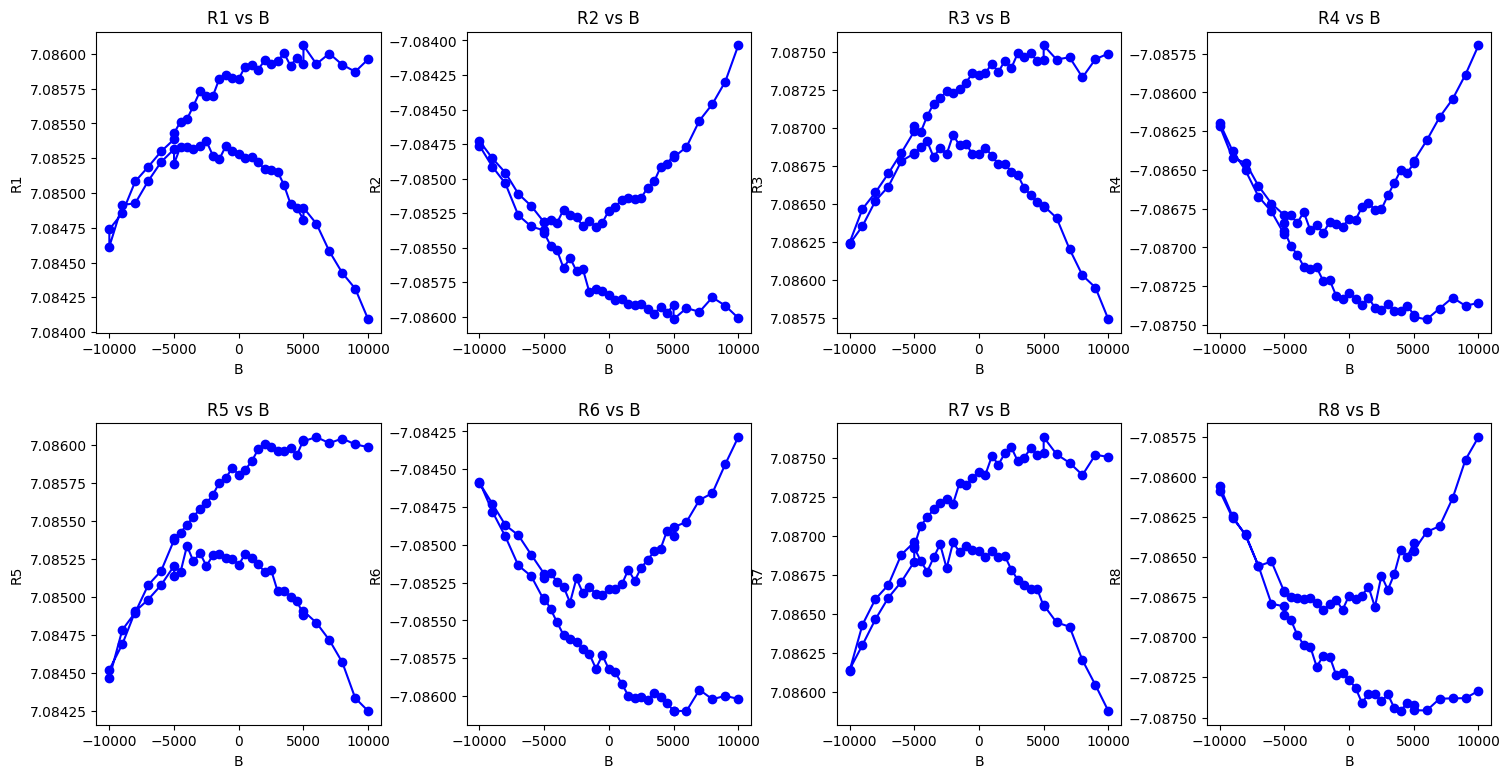

In [11]:
plt.figure(figsize=(18,9))
plt.subplot(2,4,1)
plt.plot(df['B'],df['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')

plt.subplot(2,4,2)
plt.plot(df['B'],df['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')

plt.subplot(2,4,3)
plt.plot(df['B'],df['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,4,4)
plt.plot(df['B'],df['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplot(2,4,5)
plt.plot(df['B'],df['R5'], 'bo-')
plt.title('R5 vs B')
plt.ylabel('R5')
plt.xlabel('B')
plt.subplot(2,4,6)
plt.plot(df['B'],df['R6'], 'bo-')
plt.title('R6 vs B')
plt.ylabel('R6')
plt.xlabel('B')
plt.subplot(2,4,7)
plt.plot(df['B'],df['R7'], 'bo-')
plt.title('R7 vs B')
plt.ylabel('R7')
plt.xlabel('B')
plt.subplot(2,4,8)
plt.plot(df['B'],df['R8'], 'bo-')
plt.title('R8 vs B')
plt.ylabel('R8')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## MR Calculation without Field correction

### Ra -> Average Resistance of Two opposite sides

### Rb -> Average Resistance of Other two opposite sides

### R -> Average Resistance

In [12]:
df['Ra'] = (df['R1'] + df['R5'] - df['R2'] - df['R6'])/4
df['Rb'] = (df['R3'] + df['R7'] - df['R4'] - df['R8'])/4
df['R'] = (df['Ra'] + df['Rb'])/2

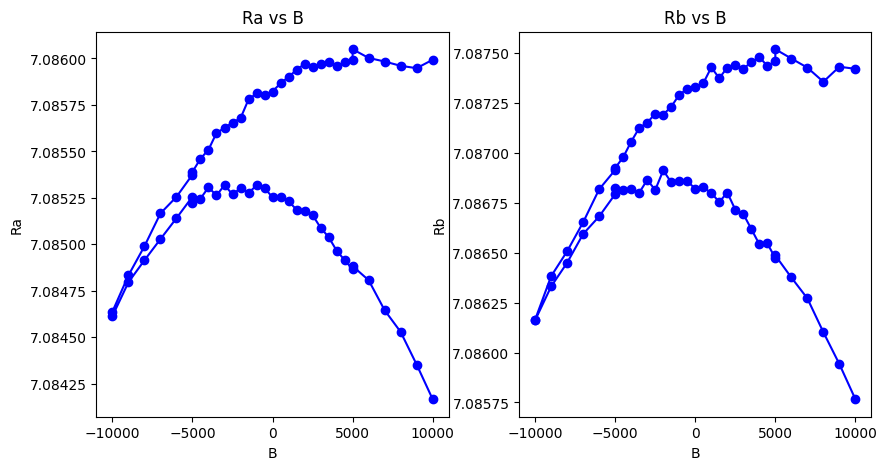

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(df['B'], df['Ra'],'bo-')
plt.title('Ra vs B')
plt.ylabel('Ra')
plt.xlabel('B')

plt.subplot(1,2,2)
plt.plot(df['B'], df['Rb'],'bo-')
plt.title('Rb vs B')
plt.ylabel('Rb')
plt.xlabel('B')

plt.show()

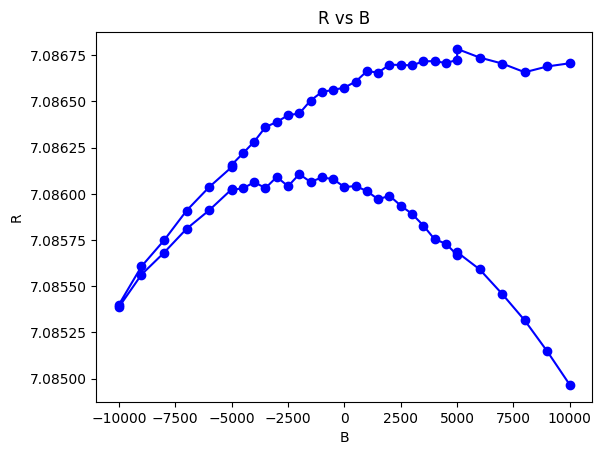

In [14]:
plt.plot(df['B'], df['R'],'bo-')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Comparing MR of Ra, Rb, R

In [15]:
Ra0 = df.loc[df['B'] == 0]['Ra'].mean()
Rb0 = df.loc[df['B'] == 0]['Rb'].mean()
R0 = df.loc[df['B'] == 0]['R'].mean()

df['MRa'] = ((df['Ra'] - Ra0)*100)/Ra0
df['MRb'] = ((df['Rb'] - Rb0)*100)/Rb0
df['MR'] = ((df['R'] - R0)*100)/R0

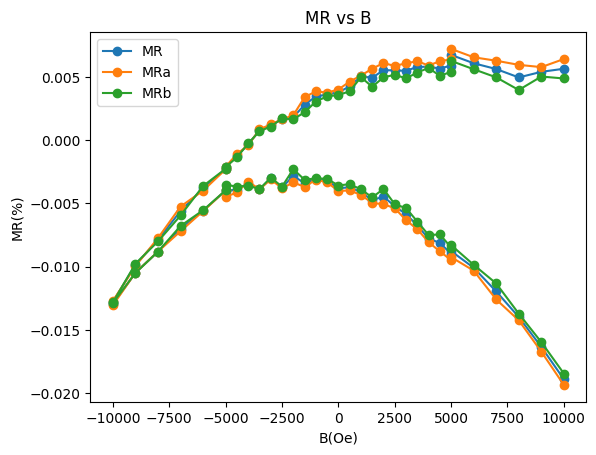

(None, 100, 10, 200)

In [16]:
plt.plot(df['B'], df['MR'], 'o-', label = "MR")
plt.plot(df['B'], df['MRa'], 'o-', label = "MRa")
plt.plot(df['B'], df['MRb'], 'o-', label = "MRb")
plt.title('MR vs B')
plt.ylabel('MR(%)')
plt.xlabel('B(Oe)')
plt.legend()
plt.show(), 100, 10, 200

# MR calculation with Field Correction

Averageing the current Reverse part

In [17]:
df['V1'] = (df['V1'] - df['V2'])/2
df['V2'] = (df['V3'] - df['V4'])/2
df['V3'] = (df['V5'] - df['V6'])/2
df['V4'] = (df['V7'] - df['V8'])/2

In [18]:
df = df[['I','B','V1','V2','V3','V4',"multiplier"]].copy()
df.head()

,I,B,V1,V2,V3,V4,multiplier
0,0.001,10000,7085.985035,7087.421730,7086.001185,7087.419244,1000000.0
1,0.001,9000,7085.895780,7087.413213,7085.999772,7087.449279,1000000.0
2,0.001,8000,7085.890670,7087.326662,7086.030244,7087.384969,1000000.0
3,0.001,7000,7085.983133,7087.428122,7085.984022,7087.425165,1000000.0
4,0.001,6000,7085.932008,7087.455544,7086.073911,7087.489055,1000000.0


In [19]:
min_B = df['B'].min()
max_B = df['B'].max()
print(min_B, max_B)

-10000 10000


In [20]:
B_min_idx = 0
for i in range(len(df)):
    if(df['B'].iloc[i]== min_B): 
        B_min_idx = i
        break

### Creating dec Field dataset

In [21]:
df_dec = df.iloc[ : B_min_idx+1].copy()
df_inc = df.iloc[B_min_idx+1 : ].copy()

data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1)
data_dec = data_dec[data_dec['B_x'] == -1*data_dec['B_y']] # selecting 
data_dec = data_dec[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns
data_dec.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [22]:
data_dec['V15'] = (data_dec['V1'] + data_dec['V5'])/2
data_dec['V26'] = (data_dec['V2'] + data_dec['V6'])/2
data_dec['V37'] = (data_dec['V3'] + data_dec['V7'])/2
data_dec['V48'] = (data_dec['V4'] + data_dec['V8'])/2

In [23]:
data_dec.head()

,I,B,V1,V2,V3,V4,V5,V6,V7,V8,multiplier,V15,V26,V37,V48
0,0.001,10000,7085.985035,7087.421730,7086.001185,7087.419244,7084.671056,7086.224480,7084.556376,7086.099658,1000000.0,7085.328046,7086.823105,7085.278781,7086.759451
34,0.001,9000,7085.895780,7087.413213,7085.999772,7087.449279,7084.883392,7086.388495,7084.708158,7086.273098,1000000.0,7085.389586,7086.900854,7085.353965,7086.861189
68,0.001,8000,7085.890670,7087.326662,7086.030244,7087.384969,7084.941460,7086.485379,7084.886710,7086.414543,1000000.0,7085.416065,7086.906021,7085.458477,7086.899756
102,0.001,7000,7085.983133,7087.428122,7085.984022,7087.425165,7085.097448,7086.608004,7084.958948,7086.579642,1000000.0,7085.540291,7087.018063,7085.471485,7087.002403
136,0.001,6000,7085.932008,7087.455544,7086.073911,7087.489055,7085.210175,7086.747873,7085.071081,7086.615642,1000000.0,7085.571091,7087.101709,7085.572496,7087.052349


In [24]:
# data_dec['Ra'] = (data_dec['V15'] + data_dec['V37'])/(2*data_dec['I']*data_dec['multiplier'])
# data_dec['Rb'] = (data_dec['V26'] + data_dec['V48'])/(2*data_dec['I']*data_dec['multiplier'])
# data_dec['R'] = (data_dec['Ra'] + data_dec['Rb'])/2

### Creating Increasing Field Dataset

In [25]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1)
data_inc = data_inc[data_inc['B_x'] == -1*data_inc['B_y']] # selecting 
data_inc = data_inc[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns
data_inc.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [26]:
data_inc['V15'] = (data_inc['V1'] + data_inc['V5'])/2
data_inc['V26'] = (data_inc['V2'] + data_inc['V6'])/2
data_inc['V37'] = (data_inc['V3'] + data_inc['V7'])/2
data_inc['V48'] = (data_inc['V4'] + data_inc['V8'])/2

In [27]:
data_inc.head()

,I,B,V1,V2,V3,V4,V5,V6,V7,V8,multiplier,V15,V26,V37,V48
0,0.001,-10000,7084.671056,7086.224480,7084.556376,7086.099658,7085.985035,7087.421730,7086.001185,7087.419244,1000000.0,7085.328046,7086.823105,7085.278781,7086.759451
34,0.001,-9000,7084.883392,7086.388495,7084.708158,7086.273098,7085.895780,7087.413213,7085.999772,7087.449279,1000000.0,7085.389586,7086.900854,7085.353965,7086.861189
68,0.001,-8000,7084.941460,7086.485379,7084.886710,7086.414543,7085.890670,7087.326662,7086.030244,7087.384969,1000000.0,7085.416065,7086.906021,7085.458477,7086.899756
102,0.001,-7000,7085.097448,7086.608004,7084.958948,7086.579642,7085.983133,7087.428122,7085.984022,7087.425165,1000000.0,7085.540291,7087.018063,7085.471485,7087.002403
136,0.001,-6000,7085.210175,7086.747873,7085.071081,7086.615642,7085.932008,7087.455544,7086.073911,7087.489055,1000000.0,7085.571091,7087.101709,7085.572496,7087.052349


### Stacking both the datas

In [28]:
data = pd.concat([data_dec,data_inc])

In [29]:
data['Ra'] = (data['V15'] + data['V37'])/(2*data['I']*data['multiplier'])
data['Rb'] = (data['V26'] + data['V48'])/(2*data['I']*data['multiplier'])
data['R'] = (data['Ra'] + data['Rb'])/2

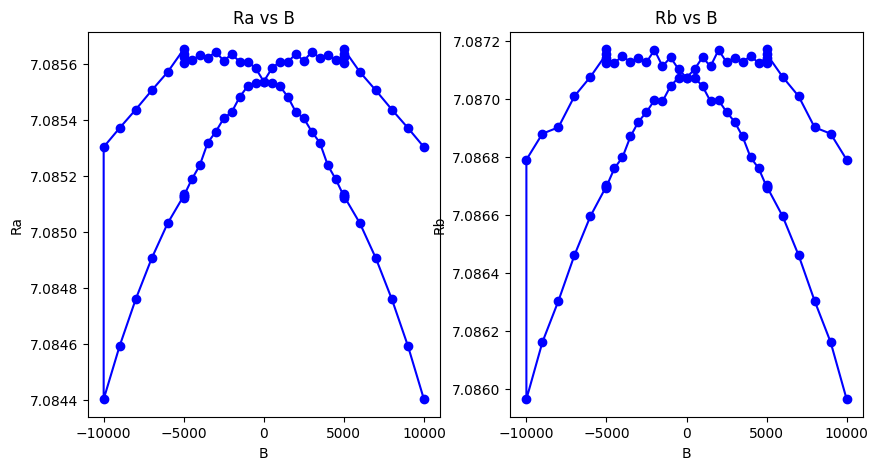

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(data['B'], data['Ra'],'bo-')
plt.title('Ra vs B')
plt.ylabel('Ra')
plt.xlabel('B')

plt.subplot(1,2,2)
plt.plot(data['B'], data['Rb'],'bo-')
plt.title('Rb vs B')
plt.ylabel('Rb')
plt.xlabel('B')

plt.show()

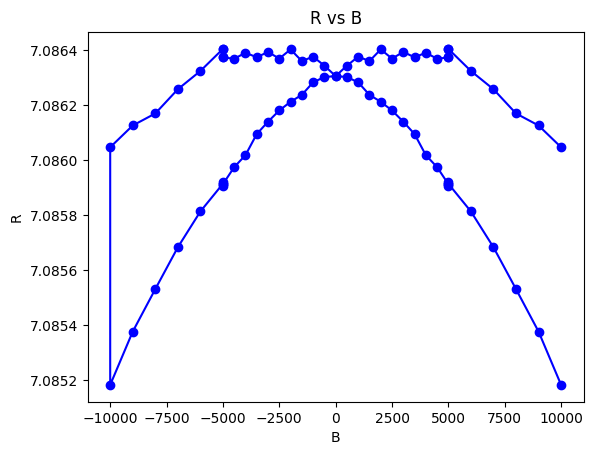

In [31]:
plt.plot(data['B'],data['R'],'bo-')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Comparing MR of Ra, Rb, R

In [32]:
Ra0 = data.loc[data['B'] == 0]['Ra'].mean()
Rb0 = data.loc[data['B'] == 0]['Rb'].mean()
R0 = data.loc[data['B'] == 0]['R'].mean()

data['MRa'] = ((data['Ra'] - Ra0)*100)/Ra0
data['MRb'] = ((data['Rb'] - Rb0)*100)/Rb0
data['MR'] = ((data['R'] - R0)*100)/R0

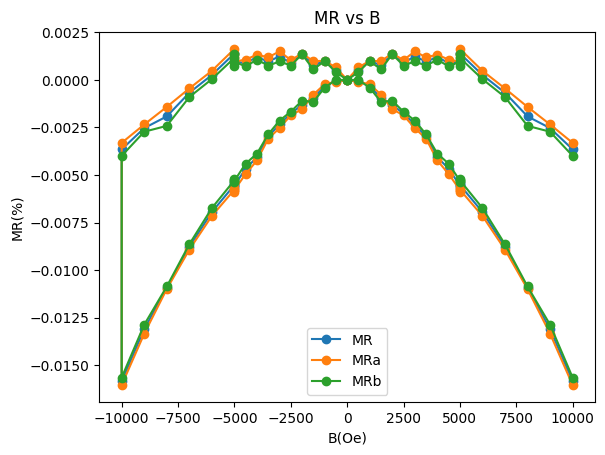

In [33]:
plt.plot(data['B'], data['MR'], 'o-', label = "MR")
plt.plot(data['B'], data['MRa'], 'o-', label = "MRa")
plt.plot(data['B'], data['MRb'], 'o-', label = "MRb")
plt.title('MR vs B')
plt.ylabel('MR(%)')
plt.xlabel('B(Oe)')
plt.legend()
plt.show()

In [34]:
data.to_pickle(f"./pickle_data/MR_CENTRAL_CONTACT_{t}K.pkl")